## WeatherPy

* Starter code provided below:

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls

Perform a weather check on each city using a series of successive API calls.
Include a print log of each city as it'sbeing processed (with the city number and city name).

In [4]:
# Create a base url
base_url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + weather_api_key

# Counters
city_counter = 1
set_counter = 1

# Create the lists to hold relative data
cities_list= []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

print("---------------------------------------------")
print("Ready - Set - Go!!! Let the count begin...")
print("---------------------------------------------")

# Create a query url for each city in the cities list to get json response
for i, city in enumerate(cities):
    
    # Group cities as sets of 50s
    if (i % 50 == 0 and i >= 50):
        set_counter += 1
        city_counter = 1
         
    # Create API url for each city
    query_url = base_url +"&q=" + city
    
    # Get json respose for each city
    response = requests.get(query_url).json()
    
    # Print the results 
    print(f"Processing Record {city_counter} of Set {set_counter} | {city}")
    
    # Increase city counter
    city_counter += 1
    
   # Add the values to the lists
    try:       
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        cities_list.append(response["name"])
    except:
        print("City not found. Skipping...")
        pass

print("---------------------------------------------")    
print("Completed / Finished / End of Count")
print("---------------------------------------------")

---------------------------------------------
Ready - Set - Go!!! Let the count begin...
---------------------------------------------
Processing Record 1 of Set 1 | buchanan
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | korla
Processing Record 4 of Set 1 | pulaski
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | kurilsk
Processing Record 7 of Set 1 | san cristobal
Processing Record 8 of Set 1 | awbari
Processing Record 9 of Set 1 | severnoye
Processing Record 10 of Set 1 | kazalinsk
City not found. Skipping...
Processing Record 11 of Set 1 | port elizabeth
Processing Record 12 of Set 1 | qaanaaq
Processing Record 13 of Set 1 | atuona
Processing Record 14 of Set 1 | tautira
Processing Record 15 of Set 1 | dinar
Processing Record 16 of Set 1 | krosno
Processing Record 17 of Set 1 | rudbar
Processing Record 18 of Set 1 | necochea
Processing Record 19 of Set 1 | west wendover
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1

Processing Record 36 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 37 of Set 4 | port hardy
Processing Record 38 of Set 4 | unguia
Processing Record 39 of Set 4 | khor
Processing Record 40 of Set 4 | bathsheba
Processing Record 41 of Set 4 | esmeraldas
Processing Record 42 of Set 4 | boende
Processing Record 43 of Set 4 | san patricio
Processing Record 44 of Set 4 | bari sadri
Processing Record 45 of Set 4 | carballo
Processing Record 46 of Set 4 | boddam
Processing Record 47 of Set 4 | matagami
Processing Record 48 of Set 4 | norman wells
Processing Record 49 of Set 4 | bilibino
Processing Record 50 of Set 4 | riyadh
Processing Record 1 of Set 5 | lekoni
Processing Record 2 of Set 5 | abonnema
Processing Record 3 of Set 5 | sur
Processing Record 4 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 5 of Set 5 | georgetown
Processing Record 6 of Set 5 | fair oaks
Processing Record 7 of Set 5 | karratha
Processing Record 8 of Set 5 | qena
Processing

Processing Record 27 of Set 8 | sal rei
Processing Record 28 of Set 8 | sarh
Processing Record 29 of Set 8 | leningradskiy
Processing Record 30 of Set 8 | ostrovnoy
Processing Record 31 of Set 8 | yaan
Processing Record 32 of Set 8 | aksarayskiy
Processing Record 33 of Set 8 | port-gentil
Processing Record 34 of Set 8 | kailua
Processing Record 35 of Set 8 | aripuana
Processing Record 36 of Set 8 | careiro da varzea
Processing Record 37 of Set 8 | atambua
Processing Record 38 of Set 8 | leon valley
Processing Record 39 of Set 8 | chara
Processing Record 40 of Set 8 | gat
Processing Record 41 of Set 8 | ukiah
Processing Record 42 of Set 8 | mangrol
Processing Record 43 of Set 8 | takoradi
Processing Record 44 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 45 of Set 8 | bacuit
City not found. Skipping...
Processing Record 46 of Set 8 | camacha
Processing Record 47 of Set 8 | marv dasht
City not found. Skipping...
Processing Record 48 of Set 8 | college
Pr

Processing Record 13 of Set 12 | umm lajj
Processing Record 14 of Set 12 | rzhev
Processing Record 15 of Set 12 | rawson
Processing Record 16 of Set 12 | ancud
Processing Record 17 of Set 12 | lac du bonnet
Processing Record 18 of Set 12 | barzas
Processing Record 19 of Set 12 | silver city
Processing Record 20 of Set 12 | birjand
Processing Record 21 of Set 12 | pilot butte
Processing Record 22 of Set 12 | falam
Processing Record 23 of Set 12 | namatanai
Processing Record 24 of Set 12 | shakawe
Processing Record 25 of Set 12 | shimoda
Processing Record 26 of Set 12 | sibu
Processing Record 27 of Set 12 | yantal
Processing Record 28 of Set 12 | bryant
Processing Record 29 of Set 12 | lubao
Processing Record 30 of Set 12 | kutum
Processing Record 31 of Set 12 | la asuncion
Processing Record 32 of Set 12 | yerbogachen
Processing Record 33 of Set 12 | abdanan
Processing Record 34 of Set 12 | konokovo
Processing Record 35 of Set 12 | requena
Processing Record 36 of Set 12 | sartell
Process

### Convert Raw Data to DataFrame

* Export the city data into a .csv.
* Display the DataFrame

In [14]:
# Create a dictionary to keep data 
weather_data = {
     "City": cities_list,
     "Cloudiness": cloudiness,
     "Country": country,
     "Date": date,
     "Humidity": humidity,
     "Lat": lat,
     "Lng": lng,
     "Max Temp": max_temp,
     "Wind Speed": wind_speed    
 }

# Create the data frame and count variables for each columns
weather_df = pd.DataFrame(weather_data)
weather_df.count()

City          562
Cloudiness    562
Country       562
Date          562
Humidity      562
Lat           562
Lng           562
Max Temp      562
Wind Speed    562
dtype: int64

In [15]:
weather_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Buchanan,97,LR,1587267125,86,5.88,-10.05,79.12,4.18
1,Albany,1,US,1587267003,44,42.60,-73.97,39.99,1.01
2,Korla,94,CN,1587267125,27,41.76,86.15,61.54,11.05
3,Pulaski,40,US,1587267125,71,34.77,-92.30,54.00,4.70
4,Bethel,1,US,1587267126,92,41.37,-73.41,36.00,6.38
5,Kuril'sk,100,RU,1587267126,69,45.23,147.88,39.92,3.49
6,San Cristobal,51,VE,1587267126,60,7.77,-72.22,67.87,1.57
7,Ubari,52,LY,1587267126,22,26.59,12.78,73.44,14.25
8,Severnoye,97,RU,1587267126,71,56.35,78.36,48.49,10.31
9,Port Elizabeth,0,ZA,1587267052,100,-33.92,25.57,57.20,4.70


## Plotting the Data

Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

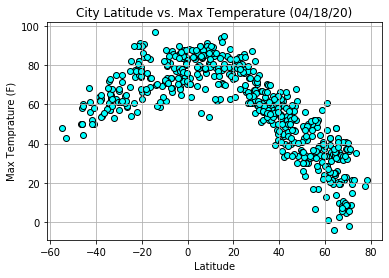

In [17]:
# Create a scatter plot for latitude and temprature
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker = "o", facecolor = "cyan", edgecolor="black")
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temprature (F)")
plt.grid()
plt.savefig("temperature.png")
plt.show()

### Latitude vs. Humidity Plot

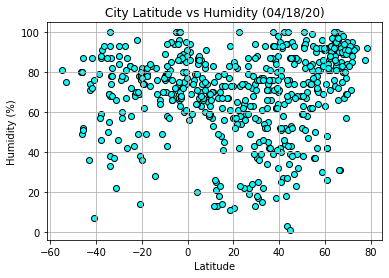

In [18]:
# Create a scatter plot for latitude and humidity
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker = "o", facecolor = "cyan", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (%s)" % time.strftime("%x"))
plt.grid()
plt.savefig("humidity.png")
plt.show()

### Latitude vs. Cloudiness Plot

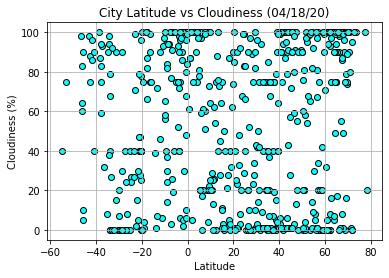

In [19]:
# Create a scatter plot for latitude and cloudiness
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker = "o", facecolor = "cyan", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (%s)" % time.strftime("%x"))
plt.grid()
plt.savefig("cloudiness.png")
plt.show()

### Latitude vs. Wind Speed Plot

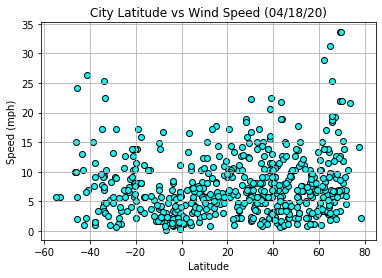

In [20]:
# Create a scatter plot for latitude and wind speed
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker = "o", facecolor = "cyan", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Speed (mph)")
plt.title("City Latitude vs Wind Speed (%s)" % time.strftime("%x"))
plt.grid()
plt.savefig("wind_speed.png")
plt.show()